# **Data Analysis of a csv file using only python**

In [15]:
data_path = "./data/Kings_County_Real_Estate_Sales.csv"

## Opening csv file using raw python

In [16]:
with open(data_path) as data:
    #print(data.readlines()) #Uncomment to print all the lines in the csv file
    print(data.readline()) #To only read the top line

ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning



## Opening csv file using the **csv** library

In [17]:
import csv

In [18]:
sales = []
with open(data_path) as csv_data:
    reader = csv.DictReader(csv_data)
    for row in reader:
        sales.append(row)

In [19]:
#printing the first 5 rows
sales[0:5]

[{'ExciseTaxNbr': '2687551',
  'Major': '138860',
  'Minor': '110',
  'DocumentDate': '08/21/2014',
  'SalePrice': '245000',
  'RecordingNbr': '20140828001436',
  'Volume': '   ',
  'Page': '   ',
  'PlatNbr': '      ',
  'PlatType': ' ',
  'PlatLot': '              ',
  'PlatBlock': '       ',
  'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
  'BuyerName': 'ALEXANDER APRIL                                   ',
  'PropertyType': '3',
  'PrincipalUse': '6',
  'SaleInstrument': '3',
  'AFForestLand': 'N',
  'AFCurrentUseLand': 'N',
  'AFNonProfitUse': 'N',
  'AFHistoricProperty': 'N',
  'SaleReason': '1',
  'PropertyClass': '8',
  'SaleWarning': ' '},
 {'ExciseTaxNbr': '3080093',
  'Major': '82204',
  'Minor': '9037',
  'DocumentDate': '10/27/2020',
  'SalePrice': '0',
  'RecordingNbr': '20201102000765',
  'Volume': '   ',
  'Page': '   ',
  'PlatNbr': '      ',
  'PlatType': ' ',
  'PlatLot': '              ',
  'PlatBlock': '       ',
  'SellerName': 'BALA RAJNI    

In [20]:
#Converting the SalePrice column from string to float since it represents **Money** data type
for i, sale in enumerate(sales):
    sale["SalePrice"] =  float(sale["SalePrice"])
    if i<10:
        print(sale["SalePrice"])

sales[0:10]

245000.0
0.0
0.0
0.0
0.0
560000.0
85000.0
0.0
5755000.0
5755000.0


[{'ExciseTaxNbr': '2687551',
  'Major': '138860',
  'Minor': '110',
  'DocumentDate': '08/21/2014',
  'SalePrice': 245000.0,
  'RecordingNbr': '20140828001436',
  'Volume': '   ',
  'Page': '   ',
  'PlatNbr': '      ',
  'PlatType': ' ',
  'PlatLot': '              ',
  'PlatBlock': '       ',
  'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
  'BuyerName': 'ALEXANDER APRIL                                   ',
  'PropertyType': '3',
  'PrincipalUse': '6',
  'SaleInstrument': '3',
  'AFForestLand': 'N',
  'AFCurrentUseLand': 'N',
  'AFNonProfitUse': 'N',
  'AFHistoricProperty': 'N',
  'SaleReason': '1',
  'PropertyClass': '8',
  'SaleWarning': ' '},
 {'ExciseTaxNbr': '3080093',
  'Major': '82204',
  'Minor': '9037',
  'DocumentDate': '10/27/2020',
  'SalePrice': 0.0,
  'RecordingNbr': '20201102000765',
  'Volume': '   ',
  'Page': '   ',
  'PlatNbr': '      ',
  'PlatType': ' ',
  'PlatLot': '              ',
  'PlatBlock': '       ',
  'SellerName': 'BALA RAJNI    

### ***1. Find the Month and Year of each sale and add them to it***

In [21]:
for sale in (sales):
    date_obj =  sale["DocumentDate"]
    #print(date_obj)
    vals = date_obj.split('/')
    sale["Month"] = int(vals[1])
    sale["Year"] = int(vals[2])

# Printing the year, month and documentdate of the first 10 rows
for i in range(0, 10):
    month = sales[i]["Month"]
    year = sales[i]["Year"]
    print(f"{month} / {year} from {sales[i]["DocumentDate"]}")

21 / 2014 from 08/21/2014
27 / 2020 from 10/27/2020
9 / 1991 from 07/09/1991
11 / 2014 from 10/11/2014
4 / 2013 from 01/04/2013
20 / 2019 from 12/20/2019
20 / 1989 from 04/20/1989
7 / 2003 from 07/07/2003
25 / 2001 from 04/25/2001
25 / 2001 from 04/25/2001


### ***2. Find range of the years in the dataset***

In [22]:
years = [ sale["Year"] for sale in sales]

print(f" From {min(years)} to {max(years)}")   

 From 1958 to 2021


### ***3. Find the number of sales in 2020***

In [23]:
prop_2020 = [sale for sale in sales if sale["Year"] == 2020]
len(prop_2020)

419

### ***4. Find the mean of sales in 2020***

In [24]:
saleprices_2020 = [sale["SalePrice"] for sale in prop_2020]
sum(saleprices_2020)/ len(saleprices_2020)

3575874.61575179

### ***5. How many properties sold in each year***

In [25]:
sales_per_year = []
for i in range(1958, 2022):
    sales_this_year = [sale for sale in sales if sale["Year"] == i]
    num_sales = len(sales_this_year)
    if num_sales > 0:
        sales_per_year.append((i, num_sales))
    

sales_per_year
    

[(1958, 1),
 (1966, 1),
 (1974, 1),
 (1976, 1),
 (1979, 1),
 (1981, 2),
 (1982, 32),
 (1983, 36),
 (1984, 48),
 (1985, 44),
 (1986, 74),
 (1987, 77),
 (1988, 66),
 (1989, 75),
 (1990, 68),
 (1991, 81),
 (1992, 338),
 (1993, 353),
 (1994, 267),
 (1995, 246),
 (1996, 347),
 (1997, 306),
 (1998, 349),
 (1999, 406),
 (2000, 279),
 (2001, 342),
 (2002, 325),
 (2003, 380),
 (2004, 447),
 (2005, 442),
 (2006, 389),
 (2007, 319),
 (2008, 231),
 (2009, 264),
 (2010, 230),
 (2011, 218),
 (2012, 364),
 (2013, 295),
 (2014, 299),
 (2015, 376),
 (2016, 290),
 (2017, 288),
 (2018, 281),
 (2019, 241),
 (2020, 419),
 (2021, 61)]

## **Charting the data**

In [26]:
from matplotlib import pyplot as plt

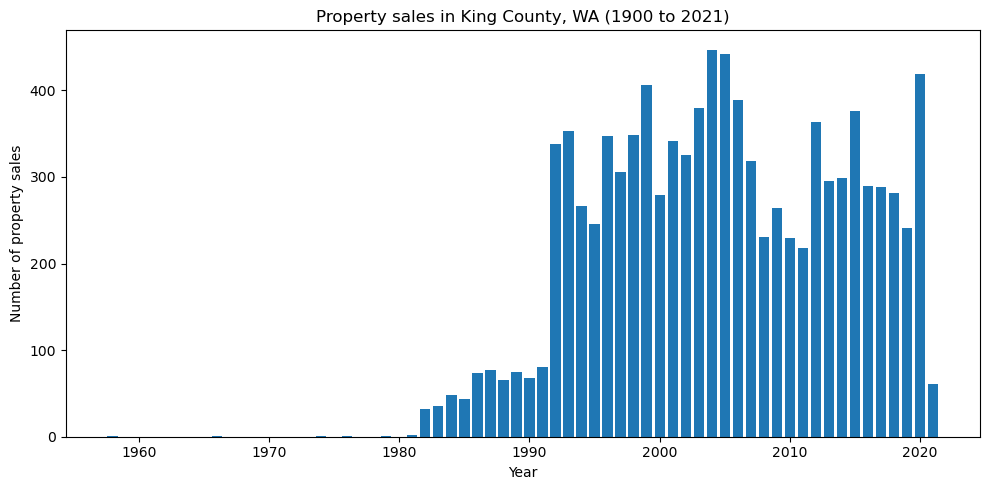

In [27]:
# create a figure and one plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# place data in a bar chart 
# where the x-axis is each year and 
# the y-axis is the number of sales per year
ax.bar(x=[sale[0] for sale in sales_per_year],
       height=[sale[1] for sale in sales_per_year])

# set axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Number of property sales")

# give the bar chart a title
ax.set_title("Property sales in King County, WA (1900 to 2021)")

# display bar chart clearly
fig.tight_layout()

### ***What can you learn from the graph***
- I can tell the data is negatively skewed.
- "Explosion"  of sales from 1992 